# Modeling the flattening of the COVID-19 peaks


_reference:https://towardsdatascience.com/covid19-visualising-the-impact-of-social-distancing-in-python-8567c14a3a73_

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Automatically plots
%matplotlib inline
# For Mac Retina Plots
%config InlineBackend.figure_format ='retina'

In [19]:
DAYS = 180; POPULATION = 100000; SPREAD_FACTOR = 4
DAYS_TO_RECOVER = 10; INITIALLY_AFFECTED = 4

**Create a DataFrame called city, where each row corresponds to a person in the city. It also contains columns to mark when a person is infected and recovered.**

In [20]:
city = pd.DataFrame(data = {'id': np.arange(POPULATION), 'infected': False, 'recovery_day': None, 'recovered': False}).set_index('id')

print(city.shape)

print(city.head())

(100000, 3)
    infected  recovered recovery_day
id                                  
0      False      False         None
1      False      False         None
2      False      False         None
3      False      False         None
4      False      False         None


**Initially random INITIALLY_AFFECTED people, using sample and mark them as infected. Also mark their recovery day.**

In [21]:
firstCases = city.sample(INITIALLY_AFFECTED, replace=False)
city.loc[firstCases.index, 'infected'] = True
city.loc[firstCases.index, 'recovery_day'] = DAYS_TO_RECOVER

In [22]:
stat_active_cases = [INITIALLY_AFFECTED]
stat_recovered = [0]
print(stat_active_cases)

[4]


**Run a for loop DAYS times to simulate each passing day.**
- Check the number of people who have recovered on this day, and mark them as recovered. These people won’t spread the virus anymore.

- On each day, count the number of infected people, use the SPREAD_FACTOR to calculate the newly infected people on that day. So the number of new cases on a day = SPREAD_FACTOR * number of active cases.

- Keep track of the number of active cases and people who recovered for visualising later.

<BarContainer object of 180 artists>

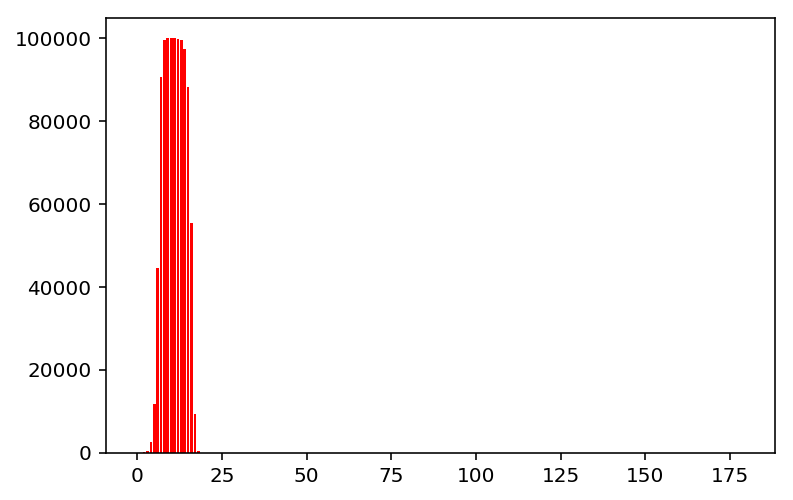

In [23]:
for today in range(1, DAYS):
    # Mark people who have recovered today
    city.loc[city['recovery_day'] == today, 'recovered'] = True
    city.loc[city['recovery_day'] == today, 'infected'] = False
    
    # Calcuate the number of people who are infected today
    spreadingPeople = city[ (city['infected'] == True)]
    totalCasesToday = round(len(spreadingPeople) * SPREAD_FACTOR)
    casesToday = city.sample(totalCasesToday, replace = True)
    # Ignore people who were already infected in casesToday
    casesToday = casesToday[ (casesToday['infected'] == False) & (casesToday['recovered'] == False) ]
    # Mark the new cases as infected, and their recovery day
    city.loc[casesToday.index, 'infected'] = True
    city.loc[casesToday.index, 'recovery_day'] = today + DAYS_TO_RECOVER

    stat_active_cases.append(len(city[city['infected'] == True]))

plt.bar(x = np.arange(DAYS), height = stat_active_cases, color = "red")